##**Project 6: Google Search Trends Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns             #Supports xls, xlsx, xlsm, xlsb, odf, ods and odt

In [2]:
! pip install pytrends

In [3]:
import pandas as pd
from pytrends.request import TrendReq

pytrend = TrendReq() ## Connecting to google

In [4]:
# cryptocurrency, AI, and elections
pytrend.build_payload(kw_list=['Bitcoins'])

In [5]:
data = pytrend.interest_by_region()

In [ ]:
data

,Bitcoins
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
...,...
Western Sahara,0
Yemen,0
Zambia,0


In [6]:
pytrend.build_payload(kw_list=['Elections'])

In [7]:
data1 = pytrend.interest_by_region()

In [8]:
data1.head()

,Elections
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0


In [9]:
pytrend.build_payload(kw_list=['AI'])

data2 = pytrend.interest_by_region()

In [10]:
data2

,AI
geoName,
Afghanistan,0
Albania,0
Algeria,21
American Samoa,0
Andorra,0
...,...
Western Sahara,0
Yemen,0
Zambia,0


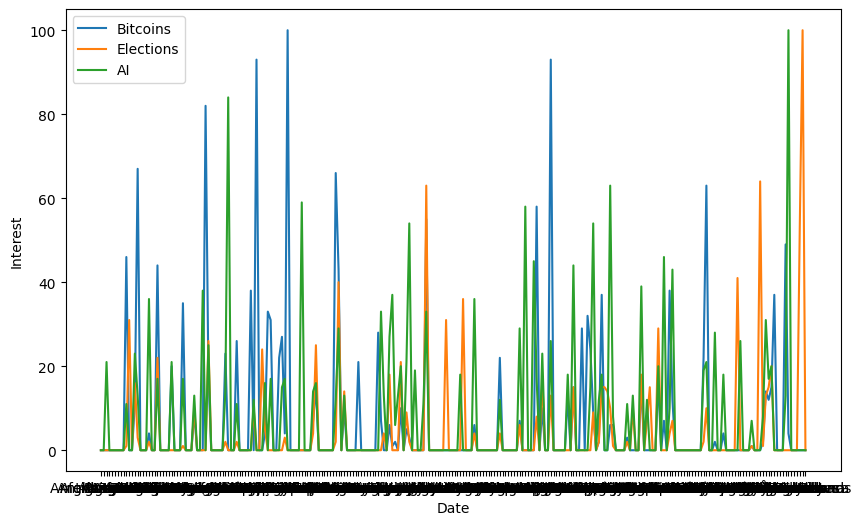

In [11]:
# Plot thye trend of data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Bitcoins'], label='Bitcoins')
plt.plot(data1.index, data1['Elections'], label='Elections')
plt.plot(data2.index, data2['AI'], label='AI')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.show()
#plt.plot(data1.index, data1['Elections'], label='Elections')
#plt.plot(data2.index, data2['AI'], label='AI')

In [12]:
# Joinning data, data1 and data2 into one df
df = pd.concat([data, data1, data2], axis=1)

In [13]:
df.head()

,Bitcoins,Elections,AI
geoName,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,21
American Samoa,0,0,0
Andorra,0,0,0


In [14]:
# Check the correlation of df
df.corr()

,Bitcoins,Elections,AI
Bitcoins,1.000000,0.149500,0.188615
Elections,0.149500,1.000000,0.153671
AI,0.188615,0.153671,1.000000


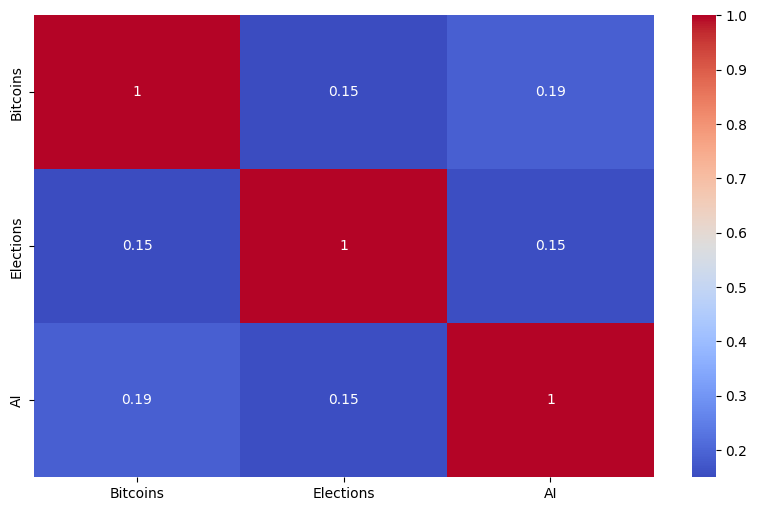

In [15]:
## Visualize the correlation of the variables in heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()